# Chapter 10 Mathematical Morphology

In [1]:
import util.nbutil
from util.imutil import *

%matplotlib inline

importing Jupyter notebook from /home/nbuser/library/util/imutil.ipynb


## 10.3 Dilation and Erosion

### Dilation

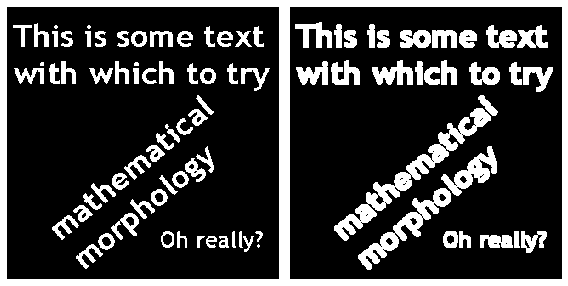

In [2]:
t = imread("morph_text.png")
td = binary_dilation(t, sq)
matplot([t, td])

### Erosion

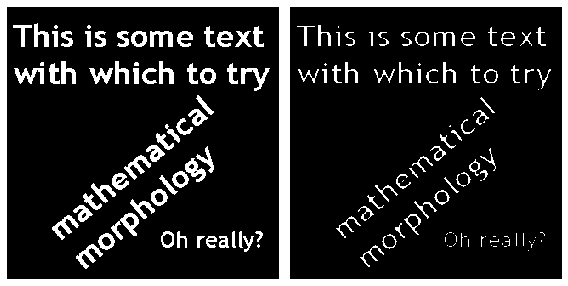

In [3]:
te = binary_erosion(t, sq)
matplot([t, te])

### Relationship between Erosion and Dilation

In [4]:
t = img_as_bool(t)
lhs = 1 - binary_erosion(t, sq)
rhs = binary_dilation(1 - t, sq)
np.array_equal(lhs, rhs)

True

### An Application: Boundary Detection

### internel boundary

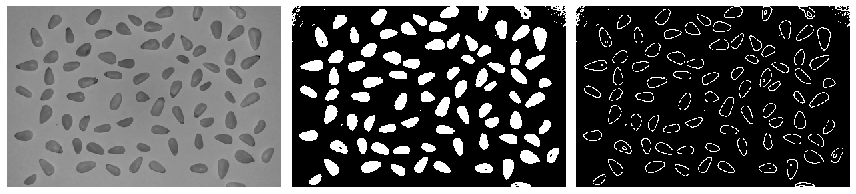

In [5]:
n = imread("pinenuts.png")
p = 1 - ((n > 130) & (n < 165))
p_int = internal_boundary(p, sq)  # A - (A erosion B)
matplot([n, p, p_int], cmap=["", "gray", "gray"])

### external boundary

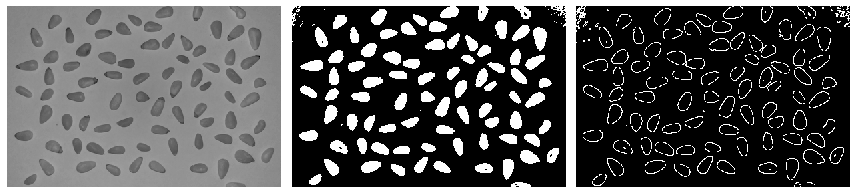

In [6]:
p_ext = external_boundary(p, sq)  # (A dilation B) - A
matplot([n, p, p_ext], cmap=["", "gray", "gray"])

### morphological gradient

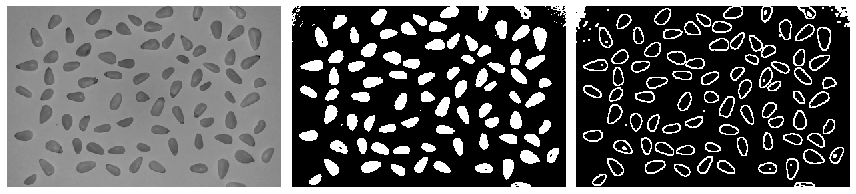

In [7]:
p_grad = morphological_gradient(p, sq)  # (A dilation B) - (A erosion B)
matplot([n, p, p_grad], cmap=["", "gray", "gray"])

## 10.4 Opening and Closing

In [8]:
test = zeros((10, 10), dtype=int64)
test[1:6, 1:4] = 1
test[2:5, 5:9] = 1
test[7:9, 3:8] = 1
test[3, 4] = 1
test

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [9]:
test_open = binary_opening(test, cr) * 1
test_open
test_close = binary_closing(test, cr) * 1
test_close

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [10]:
test_open = binary_opening(test, sq) * 1
test_open
test_close = binary_closing(test, sq) * 1
test_close

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

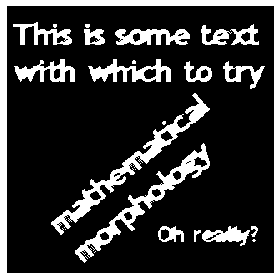

In [11]:
k = array([[0, 0, 0, 0, 1, 1], 
           [0, 0, 1, 1, 0, 0], 
           [1, 1, 0, 0, 0, 0]])
matplot([binary_closing(t, k)])

### An application: Noise Removal

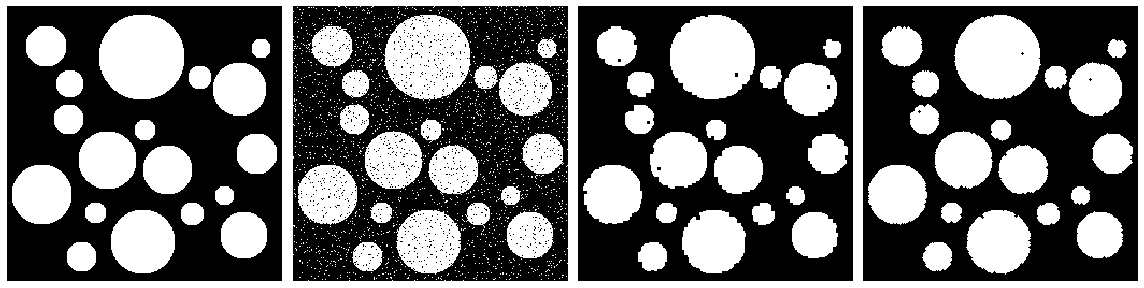

In [12]:
c = img_as_bool(imread("circles.png")) * 1
x = np.random.random_sample(c.shape)
c2 = np.copy(c)
c2[np.nonzero(x > 0.95)] = 0
c2[np.nonzero(x <= 0.05)] = 1
cf1 = binary_closing(binary_opening(c2, sq), sq)
cf2 = binary_closing(binary_opening(c2, cr), cr)
matplot([c, c2, cf1, cf2], cmap=["gray", "gray", "", ""])

## 10.5 The Hit-or-Miss Transform

[281] [296]


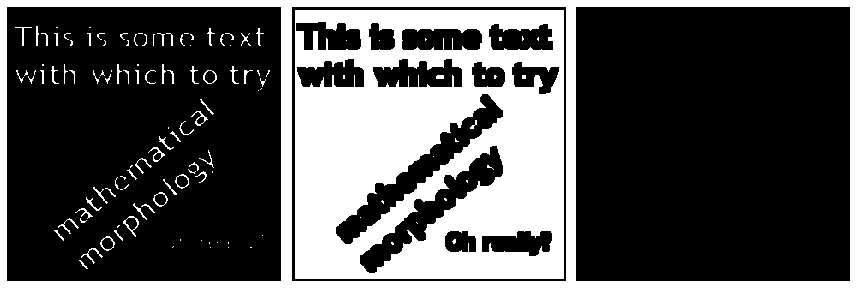

In [13]:
t = imread("morph_text.png")
b1 = array([[0, 1, 1, 0],
            [1, 1, 1, 1], 
            [1, 1, 1, 1], 
            [0, 1, 1, 0]])
x, y, tb1, tb2, tb3 = hit_or_miss(t, b1)
print(x, y)
matplot([tb1, tb2, tb3], cmap=["", "", "gray"])

## 10.6 Some Morphological Algorithms

### Connected Components

In [14]:
X = array([[1, 1, 0, 1, 1, 0], 
           [1, 1, 1, 0, 1, 0], 
           [0, 0, 0, 1, 1, 1], 
           [1, 1, 1, 0, 0, 0], 
           [1, 1, 1, 0, 0, 0], 
           [1, 1, 1, 0, 0, 0]])
label(X, 4)

array([[1, 1, 0, 2, 2, 0],
       [1, 1, 1, 0, 2, 0],
       [0, 0, 0, 2, 2, 2],
       [3, 3, 3, 0, 0, 0],
       [3, 3, 3, 0, 0, 0],
       [3, 3, 3, 0, 0, 0]])

In [15]:
label(X, 8)

array([[1, 1, 0, 1, 1, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0]])

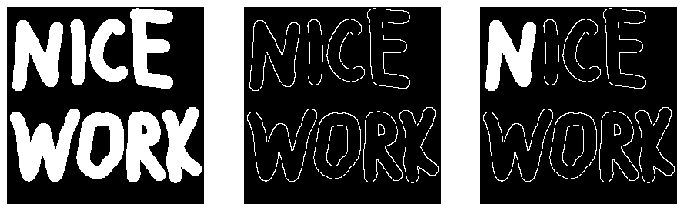

In [16]:
n = img_as_bool(imread("nicework.png")) * 1
nb = internal_boundary(n, sq)
nb1 = nb[0:120, 0:80]
nf = binary_fill_holes(nb1, sq)
nb2 = np.copy(nb)
nb2[0:120, 0:80] = nf
matplot([n, nb, nb2], cmap=["gray", "gray", "gray"])

### Skeletonization

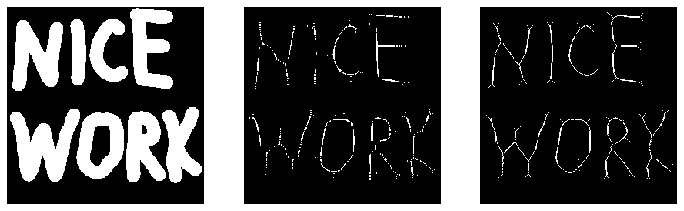

In [17]:
matplot([n, bwskel(n, sq), bwskel(n, cr)], cmap=["gray", "gray", "gray"])